In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

In [4]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month 

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['month'] = df['date'].apply(lambda date:date.month)

In [8]:
df['year'] = df['date'].apply(lambda date:date.year)

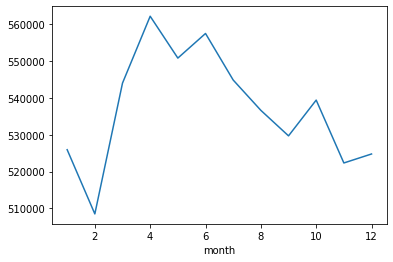

In [9]:
df.groupby('month').mean()['price'].plot()

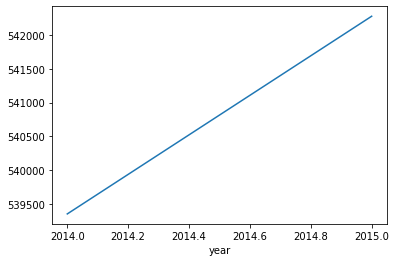

In [10]:
df.groupby('year').mean()['price'].plot();

In [11]:
df = df.drop('date',axis=1)

In [12]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [13]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [14]:
df = df.drop('zipcode',axis=1)

In [15]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Train Test Split

In [17]:
X = df.drop('price',axis=1)
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
full_scaler = MinMaxScaler() 
full_scaler.fit(X)
X = scaler.transform(X)

In [25]:
X.shape

(21597, 19)

### Detect & Remove Outlier

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng,contamination=.1)

In [28]:
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [29]:
X_train_cleaned = X_train[np.where(y_pred_train == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred_train == 1, True, False)]

In [30]:
X_test_cleaned = X_test[np.where(y_pred_test == 1, True, False)]
y_test_cleaned = y_test[np.where(y_pred_test == 1, True, False)]

In [31]:
X_train_cleaned.shape

(13605, 19)

In [32]:
y_train_cleaned.shape

(13605,)

In [33]:
X_test_cleaned.shape

(5847, 19)

In [34]:
y_test_cleaned.shape

(5847,)

In [35]:
clf = IsolationForest(max_samples=100, random_state=rng,contamination=.1)

In [36]:
clf.fit(X)
y_pred_train = clf.predict(X)

In [37]:
X = X[np.where(y_pred_train == 1, True, False)]
y = y[np.where(y_pred_train == 1, True, False)]

In [38]:
X.shape

(19437, 19)

In [40]:
y.shape

(19437,)

### Principal Component Analysis (PCA)

In [86]:
from sklearn.decomposition import PCA

In [87]:
n_components = 0.95

In [88]:
pca = PCA(n_components = n_components)

In [89]:
pca.fit(X_train_cleaned)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
X_train_pca = pca.transform(X_train_cleaned)
X_test_pca = pca.transform(X_test_cleaned)

In [91]:
X_train_cleaned.shape

(13605, 19)

In [92]:
X_train_pca.shape

(13605, 9)

In [93]:
X_test_cleaned.shape

(5847, 19)

In [94]:
X_test_pca.shape

(5847, 9)

In [95]:
pca = PCA(n_components = n_components)

In [96]:
pca.fit(X)
X_pca = pca.transform(X)

In [97]:
X.shape

(19437, 19)

In [98]:
X_pca.shape

(19437, 10)

In [99]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Cross Validation if data < 100 k

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
lin_reg_cvs = LinearRegression()
lin_scores = cross_val_score(lin_reg_cvs, X_pca, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [148067.43594807 155190.70658099 151660.18203184 153938.77807555
 149351.76974525 151752.5871721  147090.60739782 161185.27990589
 160320.33703898 179031.51291471]
Mean: 155758.91968111985
Standard deviation: 8964.941559525174


In [103]:
tree_reg_cvs = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg_cvs, X_pca, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [164939.13077287 176029.65620762 160832.46668165 174434.41380954
 165120.87555053 168754.25422388 173240.38056123 169026.54726872
 177591.90538262 177970.7482197 ]
Mean: 170794.0378678359
Standard deviation: 5633.357362994489


In [105]:
forest_reg_cvs = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg_cvs, X_pca, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [115812.36264709 121027.25365048 114905.2087722  117367.95356741
 118946.13028613 112287.67895133 115708.35689877 121013.26124921
 126992.91155125 125670.07755565]
Mean: 118973.11951295224
Standard deviation: 4494.633634048569


In [106]:
svm_reg_rbf = SVR(kernel="rbf")
svm_rbf_scores = cross_val_score(svm_reg_rbf, X_pca, y, scoring="neg_mean_squared_error", cv=10)
svm_rbf_rmse_scores = np.sqrt(-svm_rbf_scores)
display_scores(svm_rbf_rmse_scores)

Scores: [239478.87989061 250934.36696943 244667.21203327 235611.70161214
 242474.04469326 249754.86216197 244984.06312535 258485.6799511
 253399.55189446 275034.20978972]
Mean: 249482.4572121296
Standard deviation: 10660.606728951629


In [ ]:
svm_reg_cvs = SVR(kernel="linear")
svm_scores = cross_val_score(svm_reg_cvs, X_pca, y, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

In [107]:
print("RMSE of Lnear Regression:", lin_rmse_scores.mean())
print("RMSE of Decision Tree:", tree_rmse_scores.mean())
print("RMSE of Random Forest:", forest_rmse_scores.mean())
print("RMSE of Support Vector (rbf):", svm_rbf_rmse_scores.mean())
#print("RMSE of Support Vector (linear):", svm_rmse_scores.mean())

RMSE of Lnear Regression: 155758.91968111985
RMSE of Decision Tree: 170794.0378678359
RMSE of Random Forest: 118973.11951295224
RMSE of Support Vector (rbf): 249482.4572121296


In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [109]:
X.shape

(19437, 19)

## Cross Validation if data >= 100 k

In [110]:
from xgboost import XGBRegressor

In [113]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

In [115]:
xgb_model.fit(X_train_pca, y_train_cleaned, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_pca, y_test_cleaned)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
xgb_predictions = xgb_model.predict(X_test_pca)

In [118]:
msr = mean_squared_error(xgb_predictions, y_test_cleaned)
print("RMSE of XGBRegressor" , np.sqrt(msr))

RMSE of XGBRegressor 118422.48566729842


## Creating a Model with Scikit if data < 100 k

In [119]:
from pprint import pprint

In [120]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [121]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_pca, y_train_cleaned)
base_accuracy = evaluate(base_model, X_test_pca, y_test_cleaned)

Model Performance
Average Error: 78326.9882 degrees.
Accuracy = 83.26%.


In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 4, 8, 10],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_cleaned)
grid_search.best_params_

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min


In [57]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_pca, y_test_cleaned)

Model Performance
Average Error: 55166.3609 degrees.
Accuracy = 87.74%.


In [58]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.97%.


### Predicting on a brand new house

In [59]:
single_house = df.drop('price',axis=1).iloc[0]

In [60]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [61]:
single_house

array([[ 0.        , -1.66666667, -0.66071429, -0.34496193, -0.5       ,
         0.        ,  0.        ,  0.        ,  0.        , -0.37864078,
         0.        , -0.43478261,  0.        , -0.29626032, -0.12871287,
        -0.56818182, -0.39305778,  0.8       ,  0.        ]])

In [63]:
base_model.predict(single_house)
#random_accuracy = evaluate(best_random, test_features, test_labels)

array([260490.])

In [64]:
best_grid.predict(single_house)

array([231812.36035159])

In [65]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

## Creating a Model with Scikit if data >= 100 k

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [47]:
xgb_reg = XGBRegressor()
xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [48]:
xgb_grid.fit(X_train_pca,y_train_cleaned)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   43.8s finished


[16:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_chil

In [49]:
print(xgb_grid.best_score_)

0.8879466144050354


In [50]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [51]:
xgb_best_grid = xgb_grid.best_estimator_

In [52]:
xgb_predictions = xgb_best_grid.predict(X_test_pca)

In [53]:
mae = mean_absolute_error(xgb_predictions, y_test_cleaned)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 63197.34867862654


### Predicting on a brand new house

In [54]:
single_house = df.drop('price',axis=1).iloc[0]

In [55]:
X_train.shape

(15117, 19)

In [56]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [57]:
xgb_best_grid.predict(single_house)

array([215698.64], dtype=float32)

In [58]:
xgb_model.predict(single_house)

array([226028.98], dtype=float32)

In [59]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

## Creating a Model with TensorFlow

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [63]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [64]:
model.fit(x=X_train_pca,y=y_train_cleaned.values,
          validation_data=(X_test_pca,y_test_cleaned.values),
          batch_size=32,epochs=600,verbose=1,
          callbacks=[early_stop])

Epoch 1/600
473/473 [==============================] - 1s 2ms/step - loss: 417322860544.0000 - val_loss: 383479545856.0000
Epoch 2/600
473/473 [==============================] - 1s 2ms/step - loss: 367566618624.0000 - val_loss: 285950574592.0000
Epoch 3/600
473/473 [==============================] - 1s 2ms/step - loss: 194536505344.0000 - val_loss: 107239972864.0000
Epoch 4/600
473/473 [==============================] - 1s 2ms/step - loss: 121314394112.0000 - val_loss: 74729594880.0000
Epoch 5/600
473/473 [==============================] - 1s 2ms/step - loss: 107740651520.0000 - val_loss: 63069716480.0000
Epoch 6/600
473/473 [==============================] - 1s 1ms/step - loss: 99953606656.0000 - val_loss: 59583266816.0000
Epoch 7/600
473/473 [==============================] - 1s 1ms/step - loss: 93077495808.0000 - val_loss: 55104946176.0000
Epoch 8/600
473/473 [==============================] - 1s 2ms/step - loss: 86790078464.0000 - val_loss: 51341201408.0000
Epoch 9/600
473/473 [===

In [65]:
losses = pd.DataFrame(model.history.history)

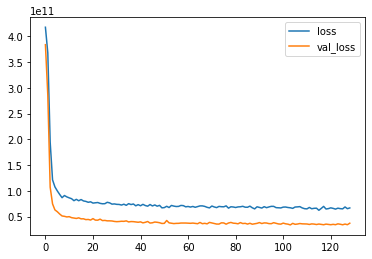

In [66]:
losses.plot()

### Evaluation on Test Data

In [67]:
predictions = model.predict(X_test_pca)

In [68]:
mean_absolute_error(y_test_cleaned,predictions)

111082.66070722415

In [69]:
np.sqrt(mean_squared_error(y_test_cleaned,predictions))

193129.4097771766

In [70]:
df['price'].mean()

540296.5735055795

In [71]:
df['price'].median()

450000.0

### Predicting on a brand new house

In [72]:
single_house

array([[ 0.        , -1.66666667, -0.66071429, -0.34496193, -0.5       ,
         0.        ,  0.        ,  0.        ,  0.        , -0.37864078,
         0.        , -0.43478261,  0.        , -0.29626032, -0.12871287,
        -0.56818182, -0.39305778,  0.8       ,  0.        ]])

In [73]:
model.predict(single_house)

array([[248472.86]], dtype=float32)

In [87]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64